<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

*Примечание: для наглядности в параметрах функции построения графиков примените figsize=(25, 25) - это позволит отобразить график достаточного размера для того, чтобы его изучить.*

In [16]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

Образцы: 178, Признаки: 13
Классы: ['class_0' 'class_1' 'class_2']


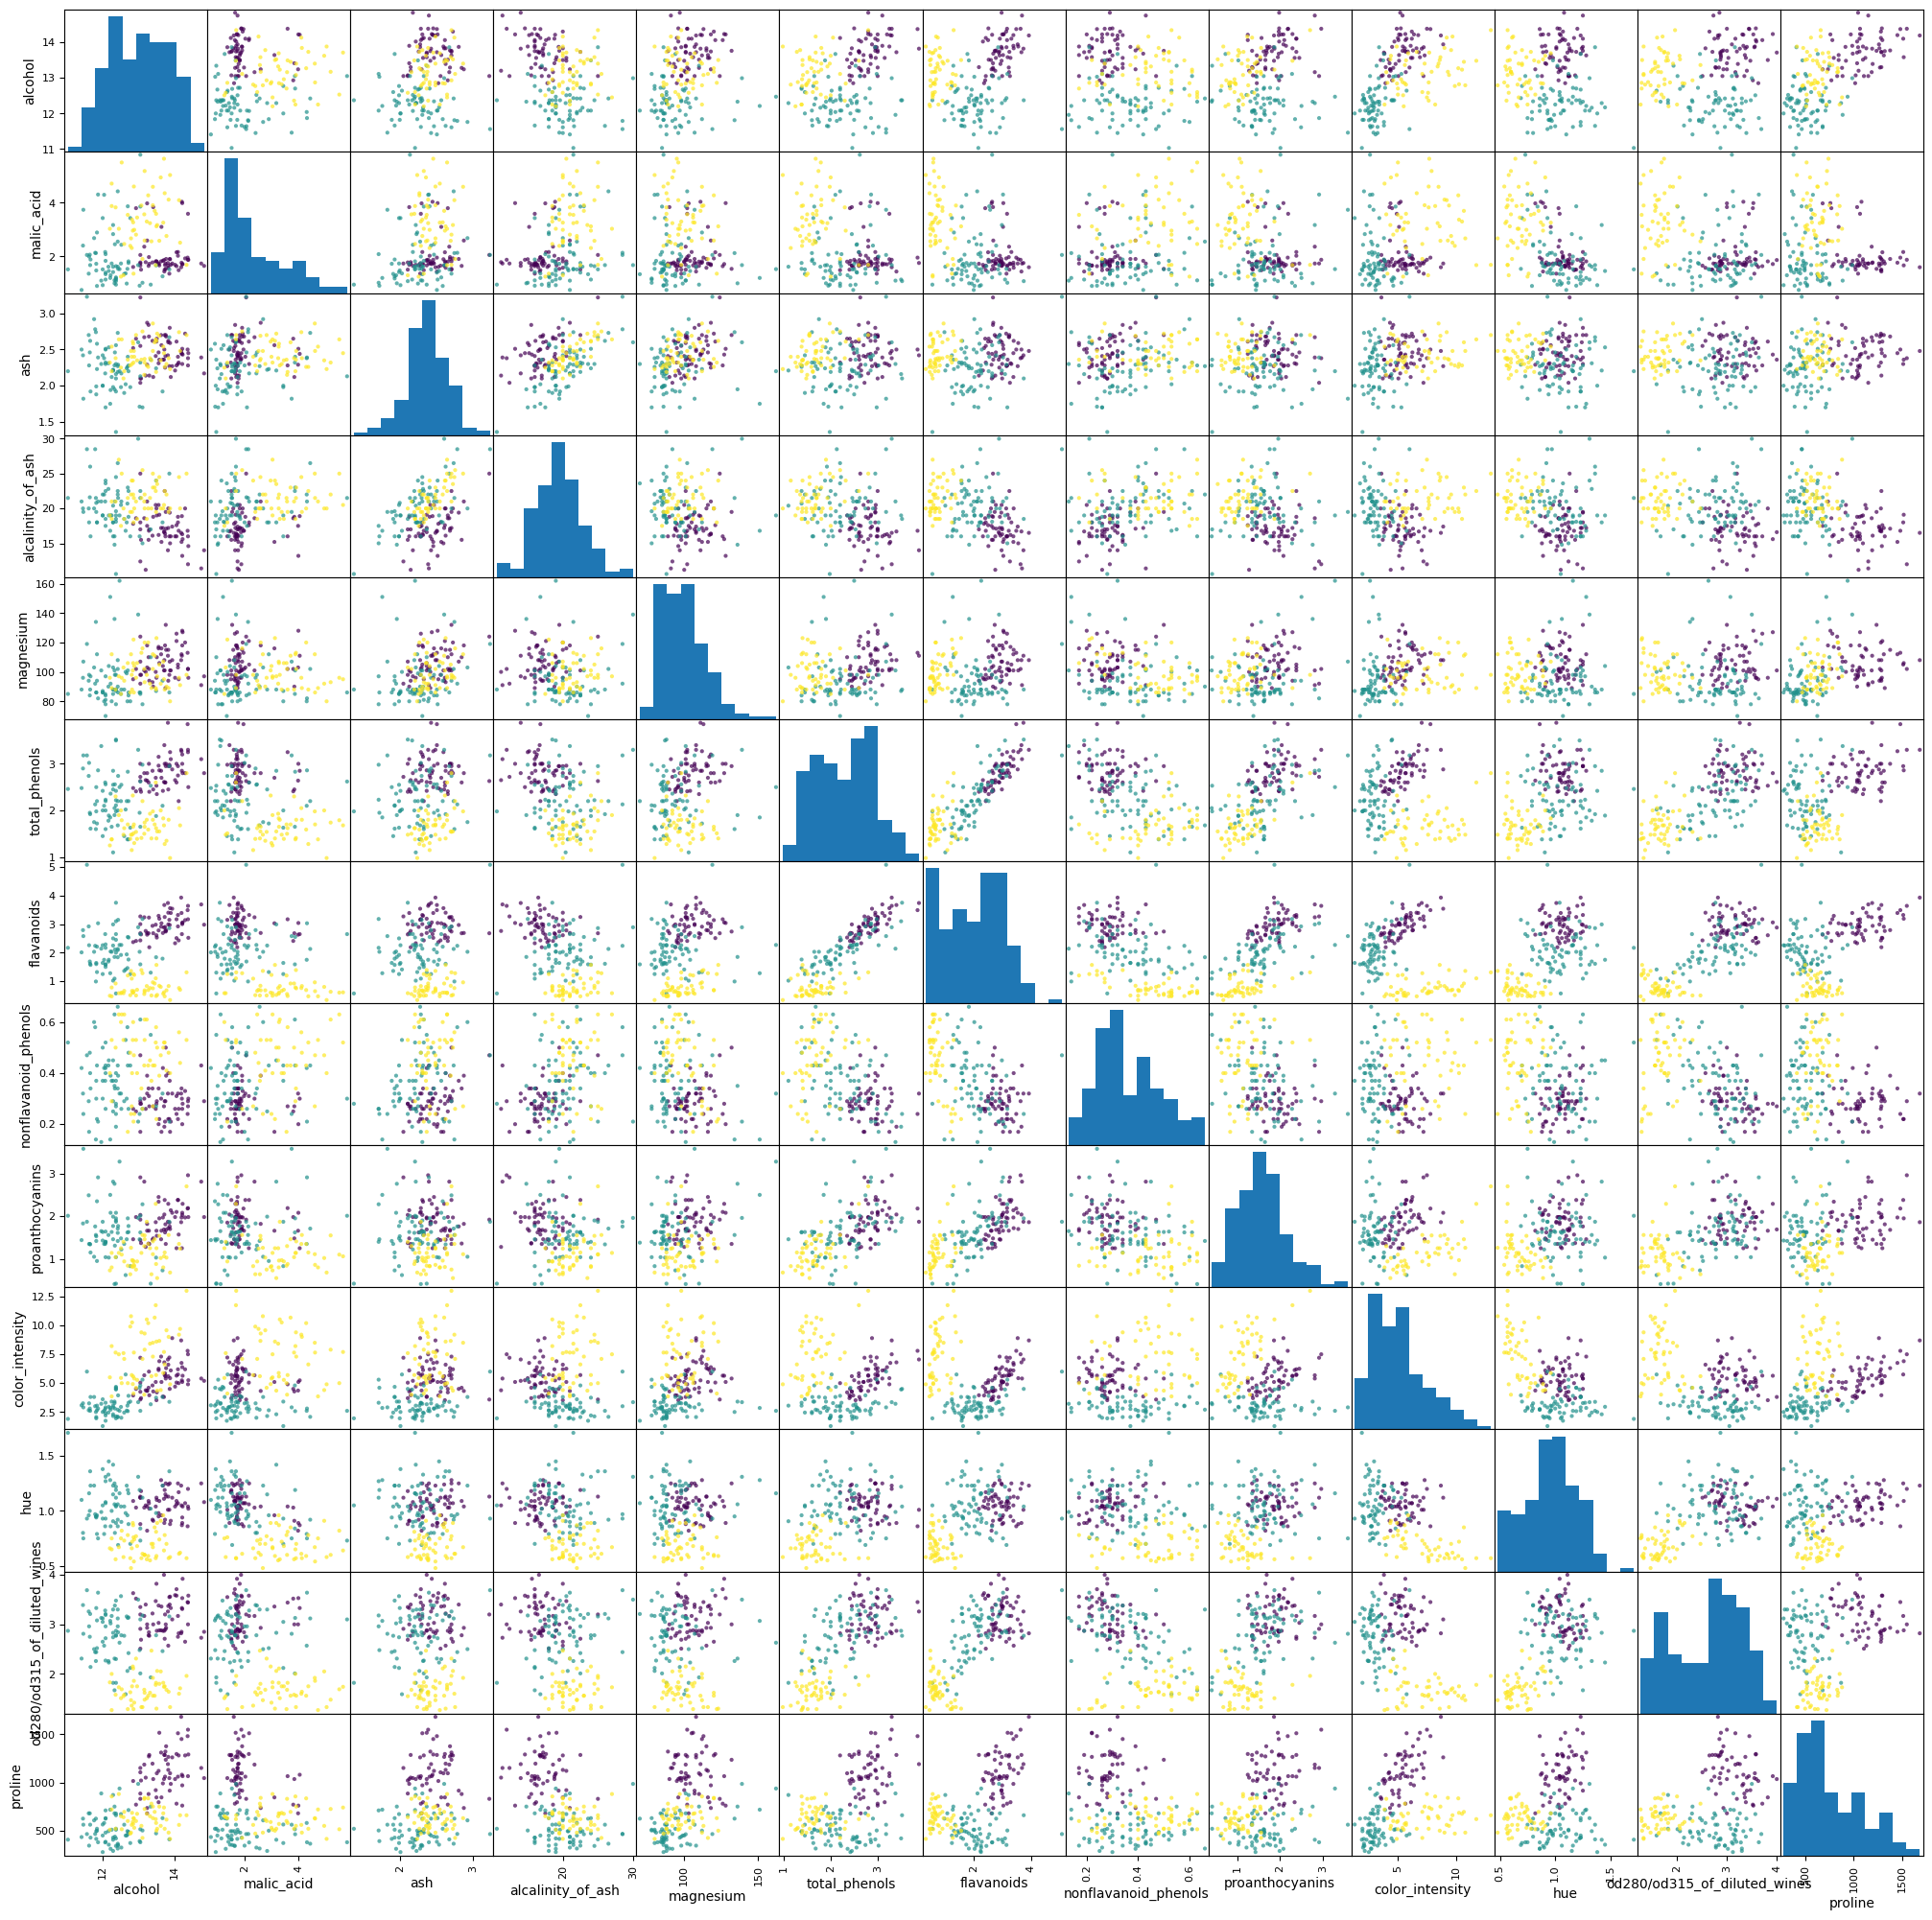

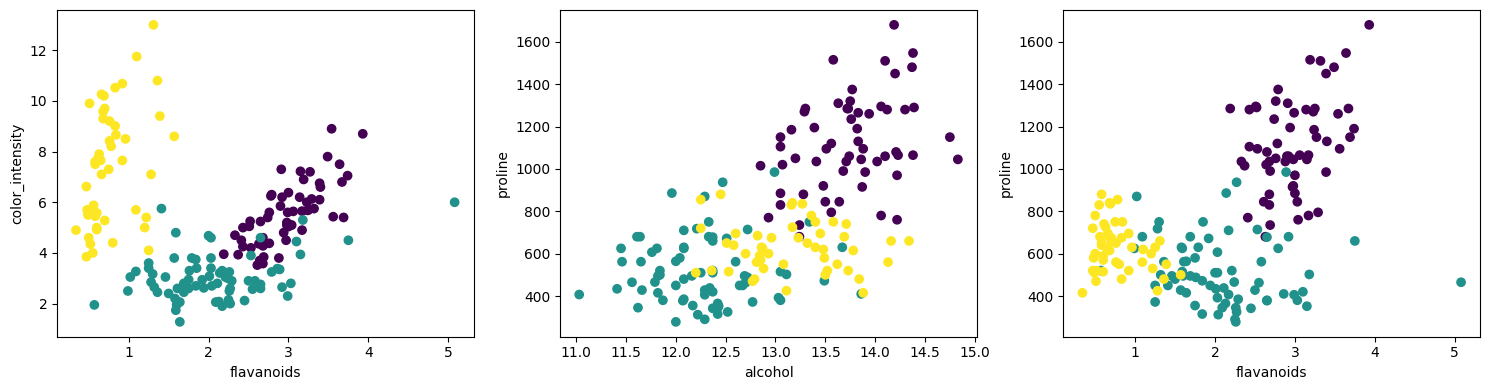

In [18]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print(f"Образцы: {len(df)}, Признаки: {len(wine.feature_names)}")
print(f"Классы: {wine.target_names}")

# Попарные графики
pd.plotting.scatter_matrix(df.iloc[:, :13], c=df['target'], figsize=(25, 25), alpha=0.7)
plt.show()

# Лучшие пары признаков
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
pairs = [('flavanoids', 'color_intensity'), ('alcohol', 'proline'), ('flavanoids', 'proline')]

for ax, (x, y) in zip(axes, pairs):
    ax.scatter(df[x], df[y], c=df['target'])
    ax.set_xlabel(x), ax.set_ylabel(y)

plt.tight_layout()
plt.show()

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [14]:
# Загружаем данные
wine = load_wine()
X, y = wine.data, wine.target

# Используем признаки flavanoids (9) и color_intensity (10)
X_selected = X[:, [9, 10]]

# Разбиваем данные
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=17)

# Обучаем модель
nb = GaussianNB()
nb.fit(X_train, y_train)

# Проверяем точность
accuracy = nb.score(X_test, y_test)
print(f"Точность: {accuracy:.3f}")

# Вероятности для тестовых данных
probabilities = nb.predict_proba(X_test)
print(f"\nВероятности первых 3 объектов:")
print(probabilities[:3])

Точность: 0.870

Вероятности первых 3 объектов:
[[2.82557388e-02 9.64584217e-01 7.16004389e-03]
 [6.59663306e-03 9.93403367e-01 3.91673041e-10]
 [6.29139181e-02 9.37084693e-01 1.38879570e-06]]


У модели GaussianNB есть метод predict_proba(test), который возвращает вероятности принадлежности каждого объекта из *test* к каждому из классов.

### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

In [15]:

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X[:, [11, 12]], y, test_size=0.3, random_state=17)

nb = GaussianNB().fit(X_train, y_train)
prob = nb.predict_proba(X_test)[0]

print("Вероятности для X_test[0]:")
print(f"Класс 0: {prob[0]:.4f}")
print(f"Класс 1: {prob[1]:.4f}")
print(f"Класс 2: {prob[2]:.4f}")

Вероятности для X_test[0]:
Класс 0: 0.0057
Класс 1: 0.9942
Класс 2: 0.0001
